In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

# 1. Data Exploration and Preprocessing

In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/SayaliD6/Datasets_used_in_assignments/main/blogs_naiveb.csv"
df = pd.read_csv(url)
# df = pd.read_csv('D:/Sayali/Jupyter_code_during_call/assignment_try/Naive Bayes/blogs.csv')

In [4]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [7]:
df.isna().sum()

Data      0
Labels    0
dtype: int64

In [8]:
print("\nCategory Distribution:")
print(df['Labels'].value_counts(normalize=True))


Category Distribution:
alt.atheism                 0.05
comp.graphics               0.05
talk.politics.misc          0.05
talk.politics.mideast       0.05
talk.politics.guns          0.05
soc.religion.christian      0.05
sci.space                   0.05
sci.med                     0.05
sci.electronics             0.05
sci.crypt                   0.05
rec.sport.hockey            0.05
rec.sport.baseball          0.05
rec.motorcycles             0.05
rec.autos                   0.05
misc.forsale                0.05
comp.windows.x              0.05
comp.sys.mac.hardware       0.05
comp.sys.ibm.pc.hardware    0.05
comp.os.ms-windows.misc     0.05
talk.religion.misc          0.05
Name: Labels, dtype: float64


In [9]:
# Preprocess the text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into string
    return ' '.join(tokens)

In [10]:
# Apply preprocessing to the 'Data' column
df['processed_text'] = df['Data'].apply(preprocess_text)

In [11]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['processed_text'])
y = df['Labels']

# 2. Naive Bayes Model for Text Classification

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# 3. Sentiment Analysis

In [15]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [16]:
# Perform sentiment analysis
df['sentiment'] = df['Data'].apply(get_sentiment)

In [17]:
# Categorize sentiments
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# 4. Evaluation

In [18]:
# Evaluate the Naive Bayes classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [19]:
print("Naive Bayes Classifier Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Classifier Performance:
Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1-score: 0.83

Detailed Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.

In [20]:
# Analyze sentiment distribution
sentiment_distribution = df['sentiment_category'].value_counts(normalize=True)
print("\nOverall Sentiment Distribution:")
print(sentiment_distribution)


Overall Sentiment Distribution:
Positive    0.7715
Negative    0.2285
Name: sentiment_category, dtype: float64


In [21]:
# Analyze sentiment distribution across categories
sentiment_by_category = df.groupby('Labels')['sentiment_category'].value_counts(normalize=True).unstack()
print("\nSentiment Distribution by Category:")
print(sentiment_by_category)


Sentiment Distribution by Category:
sentiment_category        Negative  Positive
Labels                                      
alt.atheism                   0.23      0.77
comp.graphics                 0.24      0.76
comp.os.ms-windows.misc       0.22      0.78
comp.sys.ibm.pc.hardware      0.20      0.80
comp.sys.mac.hardware         0.24      0.76
comp.windows.x                0.27      0.73
misc.forsale                  0.16      0.84
rec.autos                     0.17      0.83
rec.motorcycles               0.26      0.74
rec.sport.baseball            0.29      0.71
rec.sport.hockey              0.34      0.66
sci.crypt                     0.19      0.81
sci.electronics               0.19      0.81
sci.med                       0.29      0.71
sci.space                     0.27      0.73
soc.religion.christian        0.13      0.87
talk.politics.guns            0.30      0.70
talk.politics.mideast         0.22      0.78
talk.politics.misc            0.22      0.78
talk.religion.misc

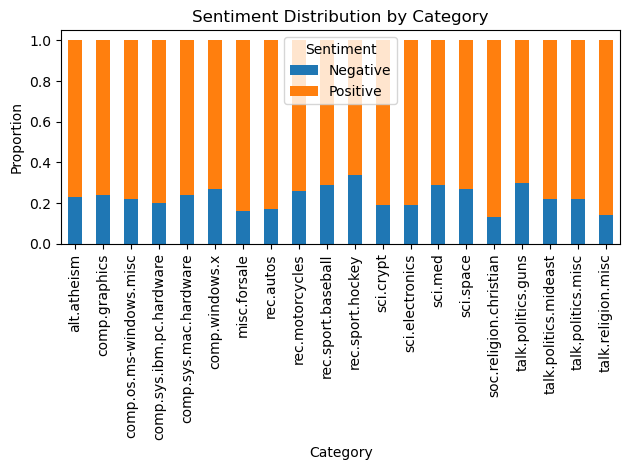

In [22]:
sentiment_by_category.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()